In [30]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.messages import SystemMessage, HumanMessage, BaseMessage
from typing import Literal, Annotated, TypedDict
from langgraph.checkpoint.memory import MemorySaver

In [31]:
load_dotenv()

True

In [32]:
class ChatbotState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [33]:
llm = ChatGroq(
    model="deepseek-r1-distill-llama-70b",
    temperature=0,
    max_tokens=None,
    reasoning_format="parsed",
    timeout=None,
    max_retries=2
)
def chat_node(state: ChatbotState):

    # Take user query from state
    message = state["messages"]

    # Send to LLM
    response = llm.invoke(message)

    # Response store state
    return {"messages": [response]}

In [34]:
# Save previous information in RAM
checkpointer = MemorySaver()
# Define graph
graph = StateGraph(ChatbotState)

# Add Node
graph.add_node("chat_node", chat_node)

# Add Edges
graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

chatbot = graph.compile(checkpointer=checkpointer)


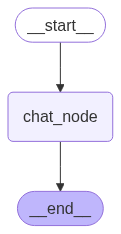

In [35]:
chatbot

In [36]:
initial_state = {
    "messages": [HumanMessage(content = "What is the capital of Bangladesh")]
}
config = {"configurable": {"thread_id": "2"}}
chatbot.invoke(initial_state, config)

{'messages': [HumanMessage(content='What is the capital of Bangladesh', additional_kwargs={}, response_metadata={}, id='06c8f130-400a-4194-a479-ad4c0b618603'),
  AIMessage(content='The capital of Bangladesh is Dhaka.', additional_kwargs={'reasoning_content': "Okay, so I need to figure out the capital of Bangladesh. Hmm, I'm not entirely sure, but I think it's Dhaka. Wait, is that right? I remember hearing that Dhaka is a big city there, but I'm not 100% certain if it's the capital. Let me think about other countries in that region. India's capital is Delhi, Pakistan's is Islamabad, so maybe Bangladesh's is different. I think I've heard Dhaka referred to as the capital before, but I'm not completely confident. Maybe I should double-check. I could look up a map or a list of capitals, but since I can't do that right now, I'll go with what I remember. Yeah, I'm pretty sure it's Dhaka. I don't recall any other major cities in Bangladesh being the capital. So, I'll say Dhaka is the capital o

In [37]:
thread_id = "1"
while True:
    user_message = input("Type here...: ")
    print(user_message)
    if user_message.strip().lower() in ["exit", "quit", "bye"]:
        break

    config = {"configurable": {"thread_id": thread_id}}
    response = chatbot.invoke({"messages": [HumanMessage(content = user_message)]}, config=config)
    print("AI: ", response['messages'][-1].content)

Hi
AI:  Hello! How can I assist you today? 😊
I am BIkas
AI:  Hello BIkas! How can I assist you today? 😊
Do you know about me
AI:  I don't have personal knowledge about individuals unless it's publicly available information. If you'd like to share more about yourself or ask about something specific, feel free to let me know, and I'll do my best to assist! 😊
What is my name?
AI:  Your name is BIkas, as you mentioned earlier! How can I assist you today? 😊
please do minus 5 from 2
AI:  Sure! 2 minus 5 equals **-3**. 😊
now add 0 with the result
AI:  The result of adding 0 to -3 is:

\boxed{-3}
bye


In [38]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='5f8ce159-89a7-469d-923a-9223c46c7178'), AIMessage(content='Hello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.071797944, 'prompt_time': 5.9589e-05, 'queue_time': 0.053877281, 'total_time': 0.071857533}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--39ab3f60-5240-47e0-ac71-149b95caba85-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20}), HumanMessage(content='I am BIkas', additional_kwargs={}, response_metadata={}, id='7af293a5-b33e-4674-8127-04cb5fcf195b'), AIMessage(content='Hello BIkas! How can I assist you today? 😊', additional_kwargs={'reasoning_content': 'Alright, the user just said, "I am BIkas.